<a href="https://colab.research.google.com/github/jsjs6/Tensorflow2/blob/main/TL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Cat and Dogs 데이터셋으로 CNN 아키텍쳐를 구축한 후 정확도와 손실함수를 파악하고 CNN 모델의 문제점 파악과 해결방안 논의
import tensorflow as tf
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Input
from keras.layers import Flatten, Conv2D, MaxPooling2D

#cats_and_dogs_filtered 데이터셋은 25,000개의 이미지를 포함하는 원본 Dogs Vs. Cats 데이터셋에서 약 3,000개의 이미지를 추출한 간소화된 버전의 데이터셋입니다.

In [ ]:
# Cat and Dogs의 다운로드와 압축풀기
!wget https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

--2023-04-03 07:53:05--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.145.128, 74.125.143.128, 173.194.69.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.145.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M  30.1MB/s    in 2.2s    

2023-04-03 07:53:07 (30.1 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
import os
import shutil

if os.path.exists('/conten/cats_and_dogs_filtered'):  # 작업 디렉토르는 cats_and_dogs_filtered
  shutil.rmtree('/conten/cats_and_dogs_filtered')
  print('/conten/cats_and_dogs_filtered is removed!!!')

In [ ]:
# 압출파일 풀기
import zipfile

with zipfile.ZipFile('/content/cats_and_dogs_filtered.zip','r') as target_file:
  target_file.extractall('/content/cats_and_dogs_filtered')

In [ ]:
# 데이터 개수 확인
import os
import glob
# 데이터 정답(label) 개수와 종류 확인
cat_train_list = os.listdir('/content/cats_and_dogs_filtered/cats_and_dogs_filtered/train/cats')
dog_train_list = os.listdir('/content/cats_and_dogs_filtered/cats_and_dogs_filtered/train/dogs')

cat_validation_list = os.listdir('/content/cats_and_dogs_filtered/cats_and_dogs_filtered/validation/cats')
dog_validation_list = os.listdir('/content/cats_and_dogs_filtered/cats_and_dogs_filtered/validation/dogs')

print('cats train file nums=', len(cat_train_list))
print('dos train file nums=', len(dog_train_list))
print('cats validation file nums=', len(cat_validation_list))
print('dogs validation file nums=', len(dog_validation_list))
print('-----------------------------------------------')

cats train file nums= 1000
dos train file nums= 1000
cats validation file nums= 500
dogs validation file nums= 500
-----------------------------------------------


In [ ]:
#train 디렉토리에서 image data읽어 x_train, y_train  생성
import os
import cv2
import glob
import numpy as np
from datetime import datetime


In [ ]:

image_list =[]
label_list = []

train_base_dir = '/content/cats_and_dogs_filtered/cats_and_dogs_filtered/train/'
train_label_list = os.listdir(train_base_dir) # 정답 이름
print('train label #=>',len(train_base_dir))
print('train_label_list=',train_label_list)

train label #=> 61
train_label_list= ['dogs', 'cats']


In [ ]:
start_time = datetime.now()

for train_label_name in train_label_list:
  #cat=>0.0, dogs=>1.0 변환
  if train_label_name =='cats':
    label_num =0.0
  else: 
    label_num =1.0
# print('label_num=',label_num)
  #이미지 파일 읽어오기
  file_path = train_base_dir + train_label_name
  train_img_file_list = glob.glob(file_path+'/*.jpg')

  # 각각의 정답 디렉토리에 있는 이미지 파일 , 즉, .jpg파일 읽어서 리스트에 저장
  for train_img_file in train_img_file_list:
    train_img = cv2.imread(train_img_file, cv2.IMREAD_COLOR)
    train_img = cv2.resize(train_img, dsize=(224,224)) # (224, 224)변환
    train_img = cv2.cvtColor(train_img, cv2.COLOR_BGR2RGB)

    image_list.append(train_img)
    label_list.append(label_num)

# numpy 변환
x_train = np.array(image_list).astype('float32')
y_train = np.array(label_list).astype('float32')

print('x_train.shape=', x_train.shape,',','y_train.shape=',y_train.shape)

end_time = datetime.now()
print('train data generation time=>',end_time - start_time)


x_train.shape= (2000, 224, 224, 3) , y_train.shape= (2000,)
train data generation time=> 0:00:04.977638


In [ ]:
# validation 디렉토리로부터 이미지 읽어서 x_val, y_val 생성

import os
import cv2
import glob
import numpy as np
from datetime import datetime

image_list =[]
label_list = []

validation_base_dir = '/content/cats_and_dogs_filtered/cats_and_dogs_filtered/validation/'
validation_label_list = os.listdir(validation_base_dir) # 정답 이름
print('validation label #=>',len(validation_base_dir))
print('validation_label_list=',validation_label_list)

validation label #=> 66
validation_label_list= ['dogs', 'cats']


In [ ]:

start_time = datetime.now()

for validation_label_name in validation_label_list:
  #cat=>0.0, dogs=>1.0 변환
  if validation_label_name =='cats':
    label_num =0.0
  else: 
    label_num =1.0
# print('label_num=',label_num)

  #이미지 파일 읽어오기
  file_path = validation_base_dir + validation_label_name
  validation_img_file_list = glob.glob(file_path+'/*.jpg')

  # 각각의 정답 디렉토리에 있는 이미지 파일 , 즉, .jpg파일 읽어서 리스트에 저장
  for validation_img_file in validation_img_file_list:
    validation_img = cv2.imread(validation_img_file, cv2.IMREAD_COLOR)
    validation_img = cv2.resize(validation_img, dsize=(224,224)) # (224, 224)변환
    validation_img = cv2.cvtColor(validation_img, cv2.COLOR_BGR2RGB)

    image_list.append(validation_img)
    label_list.append(label_num)

# numpy 변환
x_val = np.array(image_list).astype('float32')
y_val = np.array(label_list).astype('float32')

print('x_val.shape=', x_val.shape,',','y_val.shape=',y_val.shape)

end_time = datetime.now()
print('train data generation time=>',end_time - start_time)


x_val.shape= (1000, 224, 224, 3) , y_val.shape= (1000,)
train data generation time=> 0:00:02.103643


In [ ]:
# validation data로 부터  test data 분리(분리 비율 5:5)
import numpy as np

#validation data random shuffle
s= np.arange(len(x_val))

# index random shuffle
np.random.shuffle(s)

# x_val, y_val 재 생성
x_val = x_val[s]
y_val = y_val[s]

#validation, test data 분리
ratio = 0.5
split_num = int(ratio*len(x_val))
print('split num=>', split_num)

x_test = x_val[0:split_num]
y_test = y_val[0:split_num]
print('x_val.shape=', x_val.shape, ',y_val.shape = ', y_val.shape)
print('x_test.shape=', x_test.shape, ',y_test.shape=', y_test.shape)

split num=> 500
x_val.shape= (1000, 224, 224, 3) ,y_val.shape =  (1000,)
x_test.shape= (500, 224, 224, 3) ,y_test.shape= (500,)


In [ ]:
# 이미지 정규화
x_train = x_train / 255.0
x_val = x_val / 255.0
x_test = x_test / 255.0

## TransferLearning_MobileNet.ipynb

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.applications import Xception, ResNet50, InceptionV3, MobileNet
from keras.layers import Flatten, Dense, Dropout, GlobalAveragePooling2D
# weights = 사전학습 모델, incoude_top = False : 사전학습기의 특징추출기만 가져와 사용한다. True : 특징추출기+분류기 둘다 가져오겠다.input_shape=새롭게학습시킬 tesnsor의 크기(w,h,c)
base_model = MobileNet(weights='imagenet',include_top=False, input_shape=(224,224,3) )

base_model.summary()

17225924/17225924 [==============================] - 1s 0us/step
Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32

In [ ]:
model = Sequential()
model.add(base_model)
model.add(Flatten()) # GlobalAveragePooling2D() 사용해도 무방
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(2, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                                 
 flatten (Flatten)           (None, 50176)             0         
                                                                 
 dense (Dense)               (None, 16)                802832    
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 2)                 34        
                                                                 
Total params: 4,031,730
Trainable params: 4,009,842
Non-trainable params: 21,888
_________________________________________

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(2e-5), metrics=['acc'])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
from datetime import datetime

# 모델이 저장될 모델 파일 경로 및 파일명 설정, 
save_file_name='saved_models/model_{epoch:02d}-{val_loss:.2f}.h5'

checkpoint = ModelCheckpoint(save_file_name, # epoch수를 2자리 숫자로 표현하고, 검증손실값을 소수 아래 둘째 자리까지 표시합니다.
                             monitor = 'val_loss', # 모니터링할 지표 지정
                             verbose=1, # 로그 메시지 출력 여부 결정
                             save_best_only=True, # 검증 손실값이 감소한 경우에만 모델을 저장할지 결정
                             mode='auto') # 모델 저장 조건, mode='min' 지정하면 검증 손실값이 최소화되는 경우 모델 저장
earlystopping = EarlyStopping(monitor='val_loss',
                              patience=5)

start_time = datetime.now()

hist= model.fit(x_train, y_train,
               epochs = 10, batch_size=16, # batch_size는 시스템 메모리에 맞게 설정
               validation_data=(x_val, y_val), 
               callbacks=[checkpoint])
end_time = datetime.now()

print('Elapsed Time=>', end_time - start_time)


Epoch 1/10
125/125 [==============================] - ETA: 0s - loss: 0.0116 - acc: 0.9970
Epoch 1: val_loss improved from inf to 0.04596, saving model to saved_models/model_01-0.05.h5
125/125 [==============================] - 10s 80ms/step - loss: 0.0116 - acc: 0.9970 - val_loss: 0.0460 - val_acc: 0.9810
Epoch 2/10
125/125 [==============================] - ETA: 0s - loss: 0.0088 - acc: 0.9975
Epoch 2: val_loss improved from 0.04596 to 0.04013, saving model to saved_models/model_02-0.04.h5
125/125 [==============================] - 9s 72ms/step - loss: 0.0088 - acc: 0.9975 - val_loss: 0.0401 - val_acc: 0.9820
Epoch 3/10
125/125 [==============================] - ETA: 0s - loss: 0.0106 - acc: 0.9980
Epoch 3: val_loss did not improve from 0.04013
125/125 [==============================] - 9s 68ms/step - loss: 0.0106 - acc: 0.9980 - val_loss: 0.0578 - val_acc: 0.9770
Epoch 4/10
125/125 [==============================] - ETA: 0s - loss: 0.0123 - acc: 0.9965
Epoch 4: val_loss did not impr

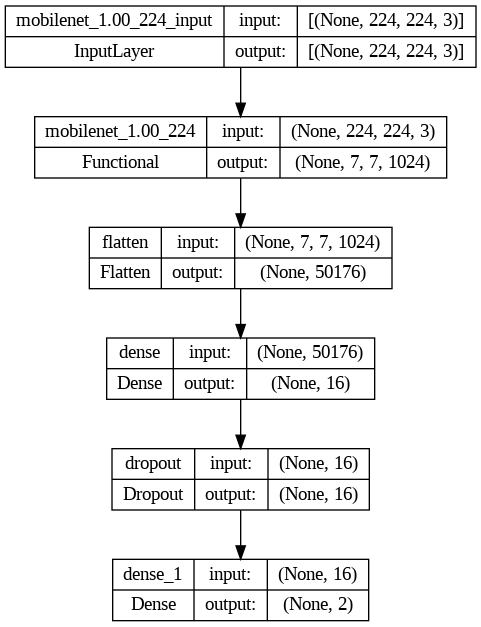

In [ ]:
# model.summary() 출력결과를 그래프로 시각화\
import tensorflow as tf
from tensorflow import keras
from keras.utils import plot_model
import pydot

# plot_model()함수는 모델 구조를 그래프로 출력 , 각각 층의 입력과 출력의 크기와 이름을 출력한다.
plot_model(model, to_file='cats_and_dogs_CNN_model.png', show_shapes=True, show_layer_names=True)


In [ ]:
model.evaluate(x_test, y_test)

16/16 [==============================] - 1s 40ms/step - loss: 0.0691 - acc: 0.9780


[0.0690562054514885, 0.9779999852180481]

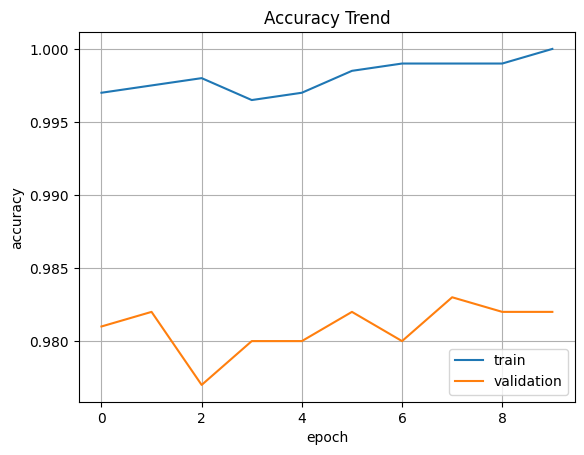

In [ ]:
import matplotlib.pyplot as plt

plt.plot(hist.history['acc'], label='train')
plt.plot(hist.history['val_acc'], label='validation')
plt.title('Accuracy Trend')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.grid()
plt.show()

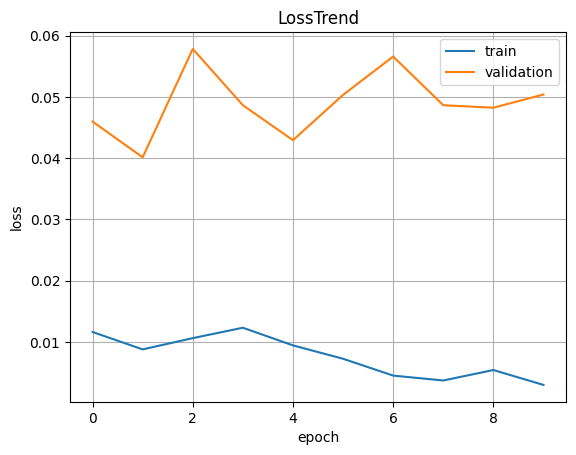

In [ ]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='validation')
plt.title('LossTrend')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.grid()
plt.show()

## Transfer Learning Test End##
## 'cats_and_dogs_Xception_Colab.h5' 파일로 예측 하는 코드

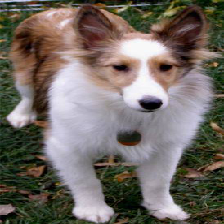

1/1 [==============================] - 0s 443ms/step
Dog


In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# 모델 불러오기
model = load_model('/content/saved_models/model_01-0.05.h5')

# 이미지 경로 지정
img_path= '/content/drive/MyDrive/dog.45.jpg' # 예측할 이미지 경로는 소스코드 위치에 test_image.jpg 파일입니다.
img.show()

# 이미지 로드 및 전처리
img = load_img(img_path, target_size=(224,224)) # 예측이미지 로드

img_array = img_to_array(img) # 이미지를 Numpy 배열로 변환
img_array = np.expand_dims(img_array, axis=0) # 배열의 차원을 추가하고
img_array = img_array / 255.0  # 이미지를 0~1범위로 정규화

# 이미지 예측하기
predictions = model.predict(img_array)  # 예측을 수행 합니다.

# 결과 출력
# print(predictions)

if predictions[0][0] > predictions[0][1]: # preds[0][0]은 예측된 결과가 'Cat'일 확률을, 
  print("Cat") # preds[0][1]은 'Dog'일 확률을 나타냅니다. 확률값을 비료하여 가장 높은 값이 'Cat'일경우 'Cat'출력 , 그렇지 않으면 'Dog'출력합니다.
else:
  print("Dog")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 'a.h5 파일이 저장된 경로 찾기
import os
print(os.getcwd()) #현재 작업 디렉토리 출력
file_path ='cats_and_dogs_Xception_Colab.h5'
print(os.path.abspath(file_path))

/content
/content/cats_and_dogs_Xception_Colab.h5


In [ ]:
!find /content/drive/MyDrive -name "cats_dogs_Xception_Colab.h5" 
# !find / -name "cats_dogs_Xception_Colab.h5"

find: ‘/content/drive/MyDrive’: No such file or directory
